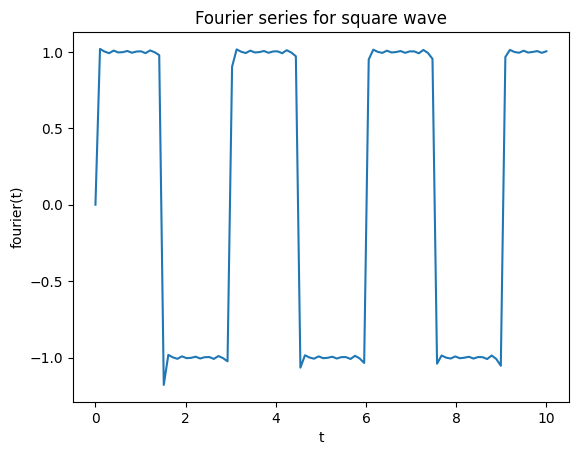

In [ ]:
"""
Task 3 part 1 testing
"""

import numpy as np
import matplotlib.pyplot as plt

T = 3
ITERS = 100
RANGE = 10

def main():

  space = np.linspace(0, RANGE, ITERS)
  plt.plot(space, fourier(space))
  plt.title("Fourier series for square wave")
  plt.xlabel("t")
  plt.ylabel("fourier(t)")


def fourier(x):

  accum = 0
  for n in range(1,ITERS):
    accum += (2/(n*np.pi))*(1+((-1)**(n+1)))*(np.sin((2*n*np.pi*x)/T))

  return accum

main()

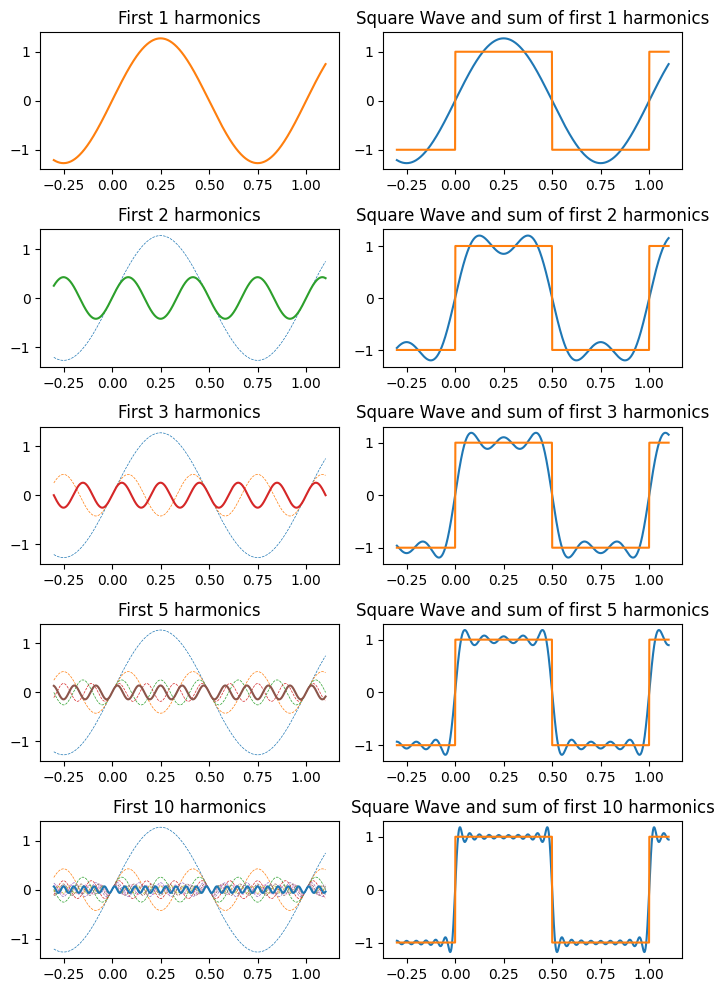

In [ ]:
"""
Task 4 Part 1

Use the theoretical calculations you did in step 1 of Task
3 to calculate and plot an approximation of the square wave by summing sinusoids weighted by
the Fourier coefficients you derived.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# constants
T = 1
BOTTOM_RANGE = -0.3
TOP_RANGE = 1.1

def main():
  # define axes
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = \
    plt.subplots(5, 2, figsize =(7, 10))
  for harmonics, (axis1, axis2) in [(1, (ax1, ax2)), (2, (ax3, ax4)), (3, (ax5, ax6)), \
                       (5, (ax7, ax8)), (10, (ax9, ax10))]:
    # for different amount of harmonics...

    # define linear space to plot over
    space = np.linspace(BOTTOM_RANGE, TOP_RANGE, 1000)
    # plot fourier series and square wave
    fourier_series = fourier(space, 2*harmonics)
    axis2.plot(space, fourier_series)
    axis2.plot(space, signal.square(2 * np.pi / T * space))
    axis2.set_title("Square Wave and sum of first %d harmonics" % harmonics)

    # plot each singular harmonic on the left
    for i in range(1, 2*harmonics, 2):
      axis1.plot(space, singular_fourier(space, i), "--", linewidth=0.5)
      axis1.set_title("First %d harmonics" % harmonics)
    axis1.plot(space, singular_fourier(space, i))

  fig.tight_layout(pad=1.0)



def fourier(x, iters):
  # calculates fourier series for 'iters' amount of harmonics
  accum = 0
  for n in range(1,iters):
    accum += (2/(n*np.pi))*(1+((-1)**(n+1)))*(np.sin((2*n*np.pi*x)/T))

  return accum

def singular_fourier(x, iter):
  # return singular harmonic for a certain value for n (iter)
  return (2/(iter*np.pi))*(1+((-1)**(iter+1)))*(np.sin((2*iter*np.pi*x)/T))

main()

In [ ]:
"""
Task 4 Part 2 (RESISTOR VOLTAGE)

Use the theoretical calculations you did in step 2 of Task 3 and the code you
wrote in the previous step of Task 4 to calculate and plot an approximation of
the responses of the RC circuits you built in Tasks 1 and 2 to a square wave input.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# constants
R = 10000
C = 1*10**-6
BOTTOM_RANGE = 0
TOP_RANGE = 0.10
FREQUENCIES = [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

def main():
  # define axes
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = \
    plt.subplots(5, 2, figsize =(7, 10))
  for freqs, (axis1, axis2) in [(1, (ax1, ax2)), (2, (ax3, ax4)), (4, (ax5, ax6)), \
                       (8, (ax7, ax8)), (13, (ax9, ax10))]:
    # define linear space
    space = np.linspace(BOTTOM_RANGE, TOP_RANGE, 1000)
    # fourier series up to 'freqs' frequencies
    fourier_series = fourier_resistor(space, FREQUENCIES[0:freqs])
    # plot series and square wave
    axis2.plot(space, fourier_series)
    axis2.plot(space, signal.square(2 * np.pi * 20 * space))
    axis2.set_title("Square Wave and sum of first %d frequencies" % freqs)


    for i in FREQUENCIES[0:freqs]:
      # plot individual harmonics up to 'freqs'
      axis1.plot(space, singular_fourier_resistor(space, i), "--", linewidth=0.5)
      axis1.set_title("First %d frequencies" % freqs)
    axis1.plot(space, singular_fourier_resistor(space, i))

  fig.tight_layout(pad=1.0)



def fourier_resistor(x, f):
  # define fourier series for resistor voltage
  accum = 0
  for freq in f:
      omega = 2*np.pi*freq
      M = (omega*R*C)/np.sqrt(1+(omega*R*C)**2)
      accum+=M*(np.sin(omega*x+np.arctan(1/(omega*R*C))))

  return accum

def singular_fourier_resistor(x, freq):
  # define individual sinusoid for a frequency
  omega = 2*np.pi*freq
  M = (omega*R*C)/np.sqrt(1+(omega*R*C)**2)
  return M*(np.sin(omega*x+np.arctan(1/(omega*R*C))))

main()

In [ ]:
"""
Task 4 Part 2 (CAPACITOR VOLTAGE)

Use the theoretical calculations you did in step 2 of Task 3 and the code you
wrote in the previous step of Task 4 to calculate and plot an approximation of
the responses of the RC circuits you built in Tasks 1 and 2 to a square wave input.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# define constants
R = 10000
C = 1*10**-6
BOTTOM_RANGE = 0
TOP_RANGE = 0.1
FREQUENCIES = [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

def main():
  #define axes
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = \
    plt.subplots(5, 2, figsize =(7, 10))
  for freqs, (axis1, axis2) in [(1, (ax1, ax2)), (2, (ax3, ax4)), (4, (ax5, ax6)), \
                       (8, (ax7, ax8)), (13, (ax9, ax10))]:

    # linear space
    space = np.linspace(BOTTOM_RANGE, TOP_RANGE, 1000)
    # fourier series up to 'freqs' frequencies
    fourier_series = fourier_capacitor(space, FREQUENCIES[0:freqs])
    # plot fourier series and square wave
    axis2.plot(space, fourier_series)
    axis2.plot(space, signal.square(2 * np.pi * 20 * space))
    axis2.set_title("Square Wave and sum of first %d frequencies" % freqs)

    for i in FREQUENCIES[0:freqs]:
      # plot individual frequency waves up to 'freqs'
      axis1.plot(space, singular_fourier_capacitor(space, i), "--", linewidth=0.5)
      axis1.set_title("First %d frequencies" % freqs)
    axis1.plot(space, singular_fourier_capacitor(space, i))

  fig.tight_layout(pad=1.0)

def fourier_capacitor(x, f):
  # define fourier series for resistor voltage
  accum = 0
  for freq in f:
    omega = 2*np.pi*freq
    M = (1)/np.sqrt(1+(omega*R*C)**2)
    accum+=M*(np.sin(omega*x+np.arctan(-omega*R*C)))

  return accum

def singular_fourier_capacitor(x, freq):
  # define individual sinusioid for a frequency
  omega = 2*np.pi*freq
  M = (1)/np.sqrt(1+(omega*R*C)**2)
  return M*(np.sin(omega*x+np.arctan(-omega*R*C)))

main()

In [ ]:
# get two data plots
# - square wave input
# - sin wave inputs (all frequencies in the same plot)



# fourier series with data using scripts above

In [ ]:
"""
Task 1 plotting data

CAPACITOR SIN INPUT
"""

import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [12, 15]
plt.rcParams["figure.autolayout"] = True

headers = ['TIME', 'CH1', 'CH2']

fig, axs = plt.subplots(13, sharex=True, sharey=True)

ctr = 0
for freq in [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]:
  f = pd.read_csv(('/content/drive/MyDrive/e12/lab3/data/task1_sin_%d.csv' % freq),
                  skiprows=21, names = headers)

  axs[ctr].plot(f.TIME, f.CH1, markersize = "0.01")
  axs[ctr].plot(f.TIME, f.CH2, markersize = "0.01")
  ctr+=1



Text(0.5, 1.0, 'RC Response Across Capacitor Given Step Input')

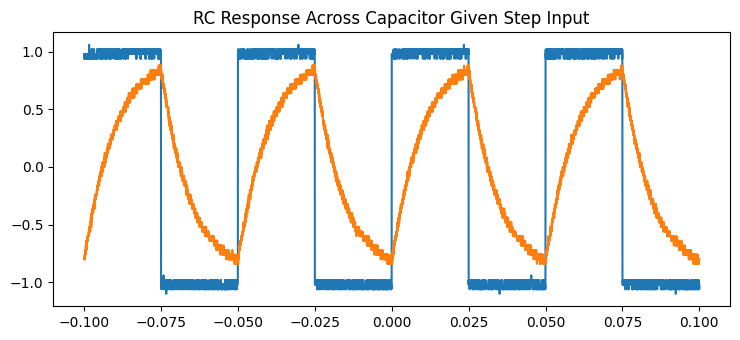

In [ ]:
"""
Task 1 plotting data

CAPACITOR STEP INPUT
"""

import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ['TIME', 'CH1', 'CH2']
f = pd.read_csv(('/content/drive/MyDrive/e12/lab3/data/task_1_rc_circuit_step.csv'),
                skiprows=21, names = headers)
plt.plot(f.TIME, f.CH1, markersize = "0.01")
plt.plot(f.TIME, f.CH2, markersize = "0.01")
plt.title("RC Response Across Capacitor Given Step Input")

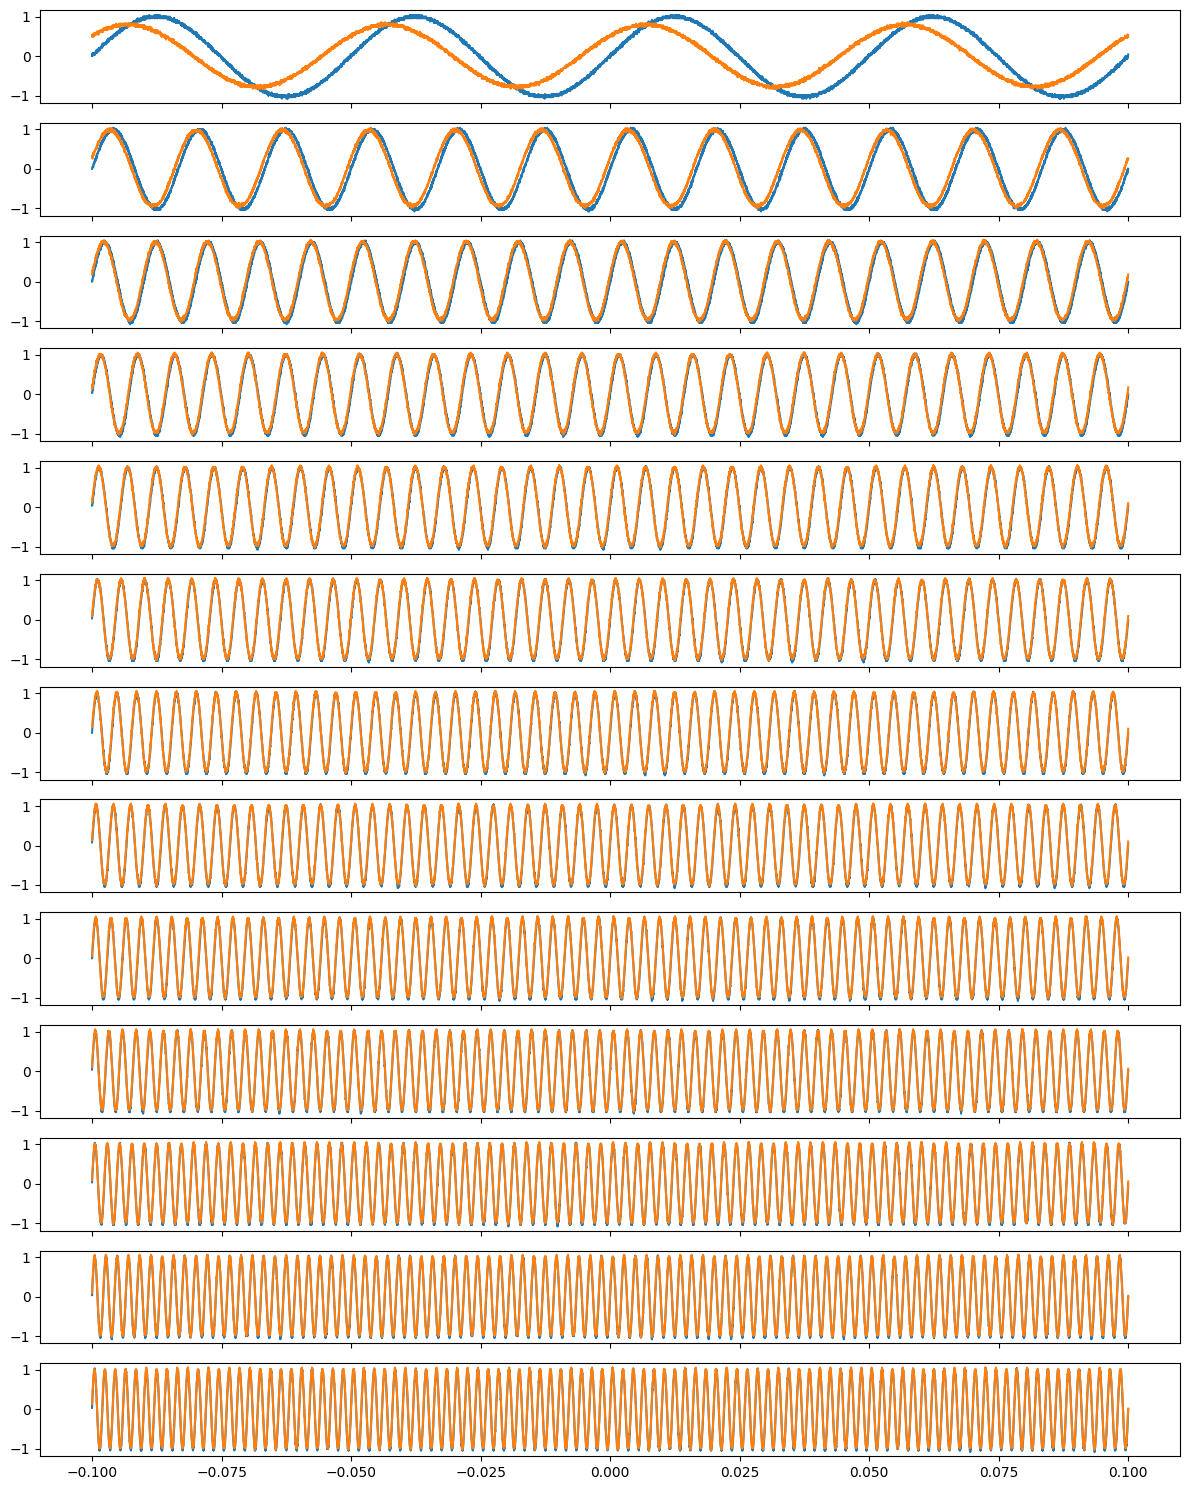

In [ ]:
"""
Task 1 plotting data

RESISTOR SIN INPUT
"""

import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [12, 15]
plt.rcParams["figure.autolayout"] = True

headers = ['TIME', 'CH1', 'CH2']

fig, axs = plt.subplots(13, sharex=True, sharey=True)

ctr = 0
for freq in [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]:
  f = pd.read_csv(('/content/drive/MyDrive/e12/lab3/data/task2_sin_%d.csv' % freq),
                  skiprows=21, names = headers)

  axs[ctr].plot(f.TIME, f.CH1, markersize = "0.01")
  axs[ctr].plot(f.TIME, f.CH2, markersize = "0.01")
  ctr+=1


Text(0.5, 1.0, 'RC Response Across Capacitor Given Step Input')

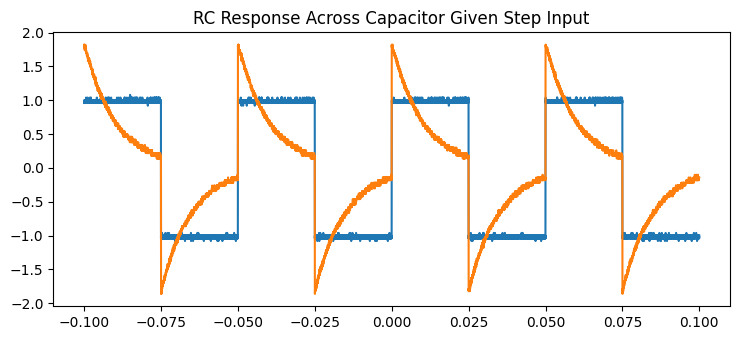

In [ ]:
"""
Task 1 plotting data

RESISTOR STEP INPUT
"""

import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ['TIME', 'CH1', 'CH2']

f = pd.read_csv(('/content/drive/MyDrive/e12/lab3/data/task2_rc_step.csv'),
                skiprows=21, names = headers)

plt.plot(f.TIME, f.CH1, markersize = "0.01")
plt.plot(f.TIME, f.CH2, markersize = "0.01")
plt.title("RC Response Across Resistor Given Step Input")

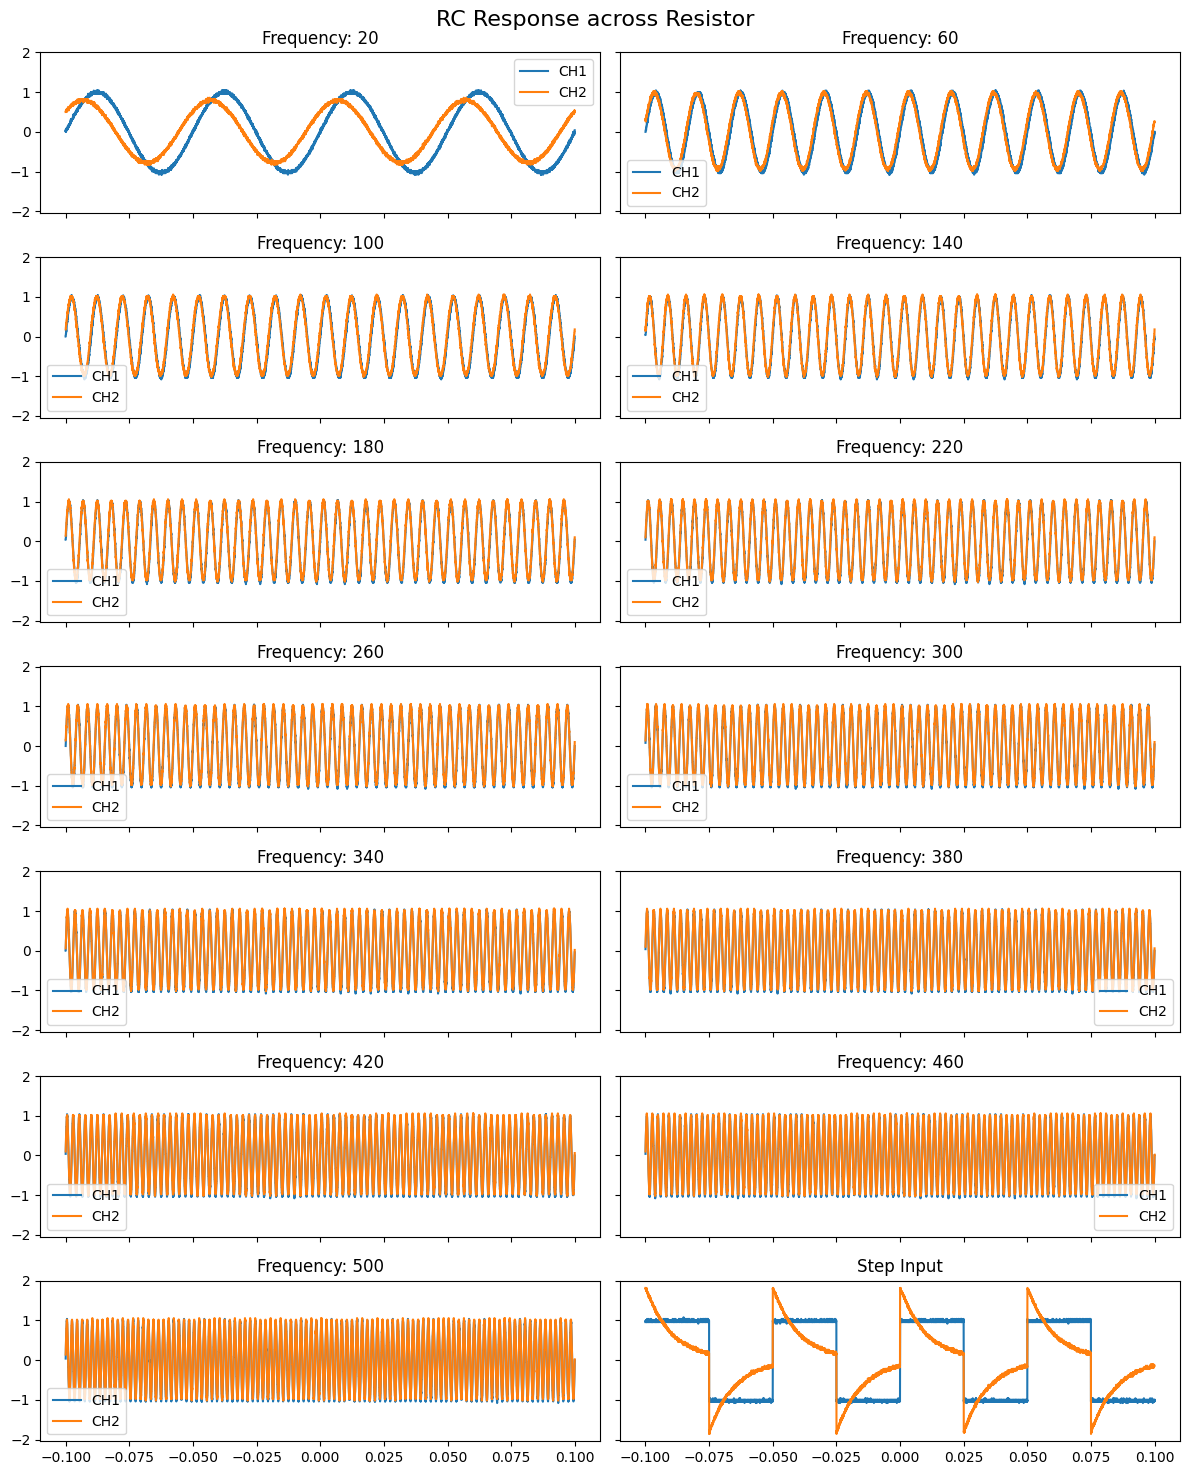

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 15]
plt.rcParams["figure.autolayout"] = True

headers = ['TIME', 'CH1', 'CH2']

fig, axs = plt.subplots(7, 2, sharex=True, sharey=True)
fig.suptitle('RC Response across Resistor', fontsize=16)

freq_list = [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

for i in range(7):
    for j in range(2):
        if i*2 + j < len(freq_list):
            freq = freq_list[i*2 + j]
            f = pd.read_csv('/content/drive/MyDrive/e12/lab3/data/task2_sin_%d.csv' % freq, skiprows=21, names=headers)
            axs[i, j].plot(f.TIME, f.CH1, label='CH1', markersize=0.01)
            axs[i, j].plot(f.TIME, f.CH2, label='CH2', markersize=0.01)
            axs[i, j].set_title('Frequency: %d' % freq)
            axs[i, j].legend()

f = pd.read_csv('/content/drive/MyDrive/e12/lab3/data/task2_rc_step.csv', skiprows=21, names=headers)

plt.plot(f.TIME, f.CH1, markersize=0.01)
plt.plot(f.TIME, f.CH2, markersize=0.01)
plt.title("Step Input")

plt.tight_layout()
plt.show()


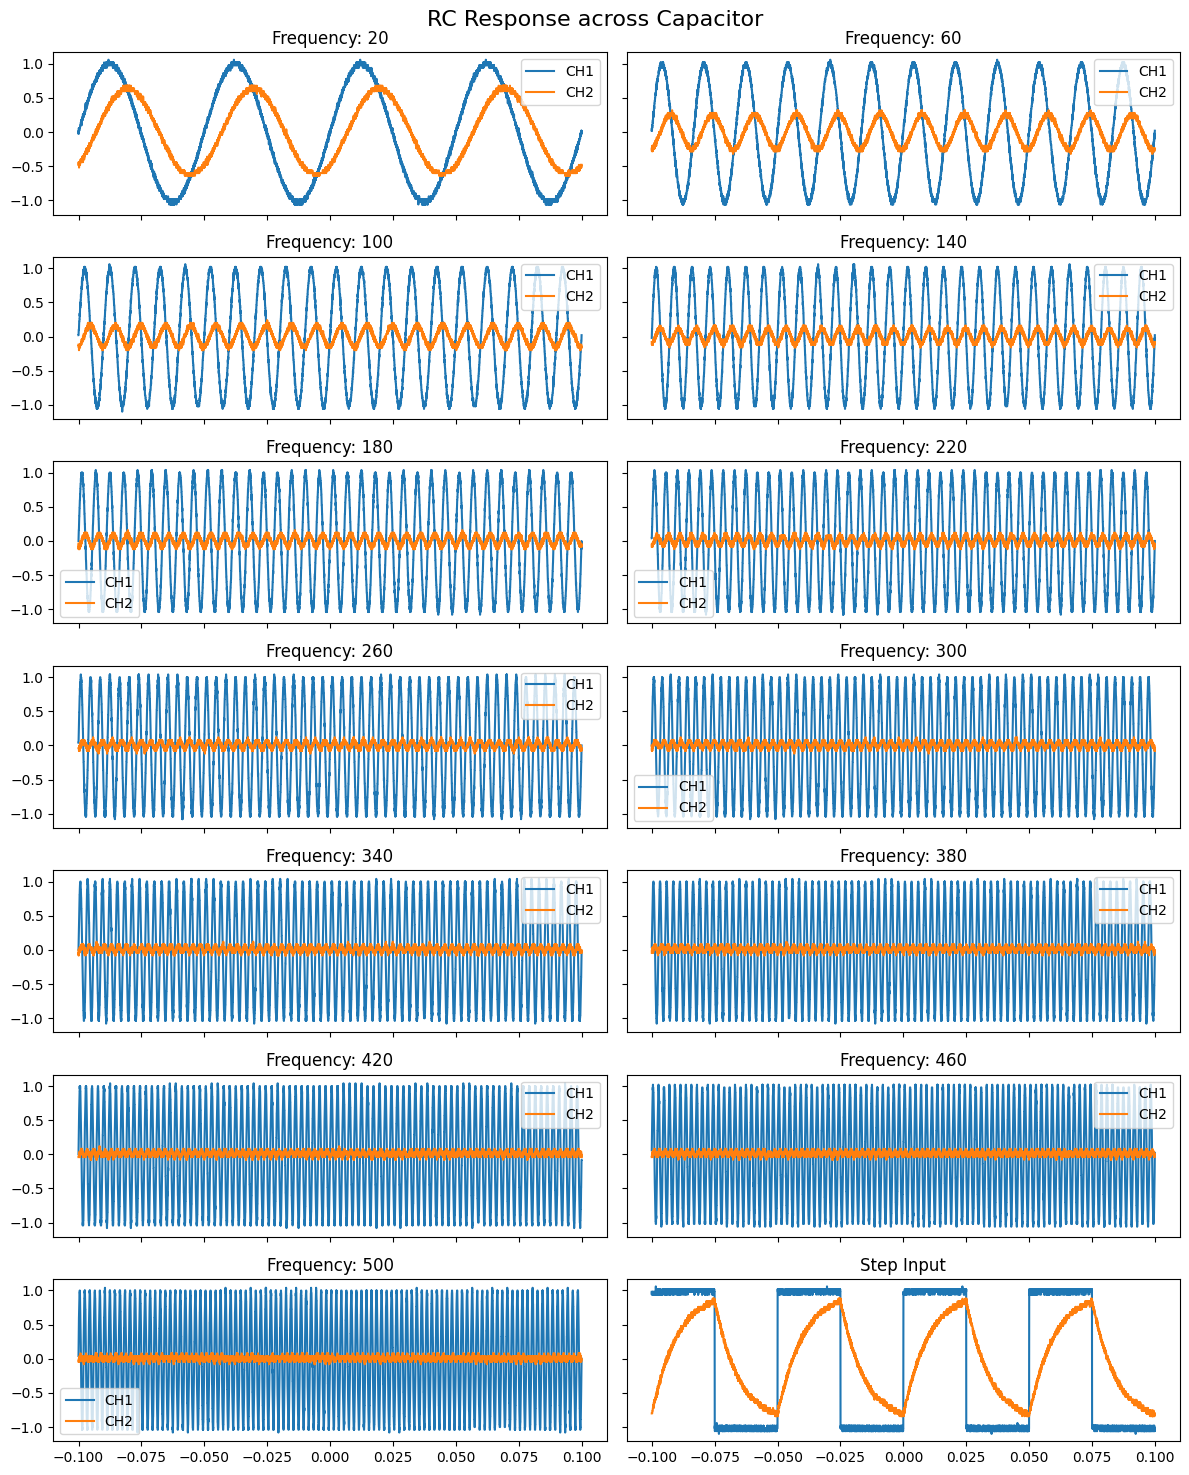

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 15]
plt.rcParams["figure.autolayout"] = True

headers = ['TIME', 'CH1', 'CH2']

fig, axs = plt.subplots(7, 2, sharex=True, sharey=True)
fig.suptitle('RC Response across Capacitor', fontsize=16)

freq_list = [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

for i in range(7):
    for j in range(2):
        if i*2 + j < len(freq_list):
            freq = freq_list[i*2 + j]
            f = pd.read_csv('/content/drive/MyDrive/e12/lab3/data/task1_sin_%d.csv' % freq, skiprows=21, names=headers)
            axs[i, j].plot(f.TIME, f.CH1, label='CH1', markersize=0.01)
            axs[i, j].plot(f.TIME, f.CH2, label='CH2', markersize=0.01)
            axs[i, j].set_title('Frequency: %d' % freq)
            axs[i, j].legend()

f = pd.read_csv('/content/drive/MyDrive/e12/lab3/data/task_1_rc_circuit_step.csv', skiprows=21, names=headers)

plt.plot(f.TIME, f.CH1, markersize=0.01)
plt.plot(f.TIME, f.CH2, markersize=0.01)
plt.title("Step Input")

plt.tight_layout()
plt.show()

In [14]:
"""
Task 5 (Capacitor Data)

Fourier approximation of the RC response. Use the data you collected in lab to
show that your the responses to the square wave input for both Task 1 and Task 2
can be reconstructed by summing the responses of your RC circuits to the sinusoid inputs.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# define constants
R = 10000
C = 1*10**-6
BOTTOM_RANGE = -0.1
TOP_RANGE = 0.1
FREQUENCIES = [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

def main():
  # load csv files
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  freq_files = []
  for freq in FREQUENCIES:
    headers = ['TIME', 'CH1', 'CH2']
    freq_files.append(pd.read_csv('/content/drive/MyDrive/e12/lab3/data/task1_sin_%d.csv' % freq,
                    skiprows=21, names = headers))
  # define axes
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = \
    plt.subplots(5, 2, figsize =(7, 10))
  for freqs, (axis1, axis2) in [(1, (ax1, ax2)), (2, (ax3, ax4)), (4, (ax5, ax6)), \
                       (8, (ax7, ax8)), (13, (ax9, ax10))]:

    # find fourier series (sum of data)
    fourier_series = fourier_capacitor(freq_files[0:freqs])
    # plot the sum of data and square wave
    axis2.plot(freq_files[0].TIME, fourier_series)
    space = np.linspace(BOTTOM_RANGE, TOP_RANGE, 1000)
    axis2.plot(space, signal.square(2 * np.pi * 20 * space))
    axis2.set_title("Square Wave and sum of first %d frequencies" % freqs)


    for i in freq_files[0:freqs]:
      # plot individual sinusoids from data
      axis1.plot(i.TIME, i.CH2, "--", linewidth=0.5)
      axis1.set_title("First %d frequencies" % freqs)
    axis1.plot(i.TIME, i.CH2)

  fig.tight_layout(pad=1.0)

def fourier_capacitor(f):
    # psuedo fourier series, adds the data of f
    accum = np.zeros(len(f[0].CH2))
    for freq in f:
      accum = np.add(accum, freq.CH2)
    return accum

main()

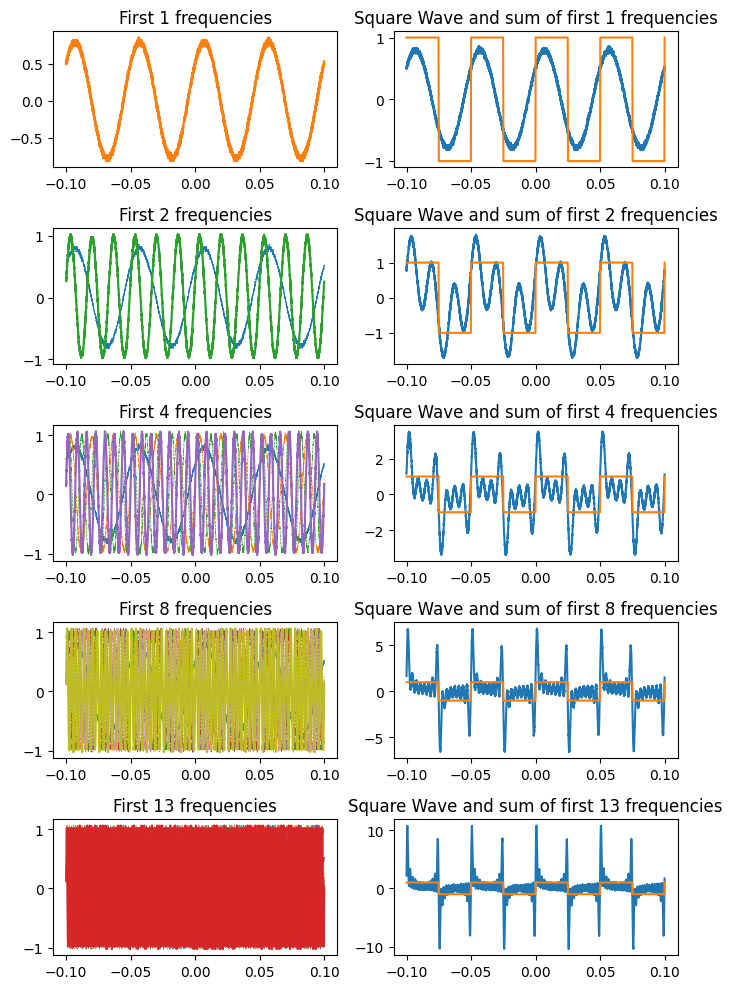

In [15]:
"""
Task 5 (Resistor Data)

Fourier approximation of the RC response. Use the data you collected in lab to
show that your the responses to the square wave input for both Task 1 and Task 2
can be reconstructed by summing the responses of your RC circuits to the sinusoid inputs.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# define constants
R = 10000
C = 1*10**-6
BOTTOM_RANGE = -0.1
TOP_RANGE = 0.1
FREQUENCIES = [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

def main():
  # load csv files
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  freq_files = []
  for freq in FREQUENCIES:
    headers = ['TIME', 'CH1', 'CH2']
    freq_files.append(pd.read_csv('/content/drive/MyDrive/e12/lab3/data/task2_sin_%d.csv' % freq,
                    skiprows=21, names = headers))

  # define axes
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = \
    plt.subplots(5, 2, figsize =(7, 10))
  for freqs, (axis1, axis2) in [(1, (ax1, ax2)), (2, (ax3, ax4)), (4, (ax5, ax6)), \
                       (8, (ax7, ax8)), (13, (ax9, ax10))]:

    # get sum of resistor data up to 'freqs'
    fourier_series = fourier_resistor(freq_files[0:freqs])
    # plot the sum of data and square wave
    axis2.plot(freq_files[0].TIME, fourier_series)
    space = np.linspace(BOTTOM_RANGE, TOP_RANGE, 1000)
    axis2.plot(space, signal.square(2 * np.pi * 20 * space))
    axis2.set_title("Square Wave and sum of first %d frequencies" % freqs)


    for i in freq_files[0:freqs]:
      # plot individual sinusoids up to 'freqs'
      axis1.plot(i.TIME, i.CH2, "--", linewidth=0.5)
      axis1.set_title("First %d frequencies" % freqs)
    axis1.plot(i.TIME, i.CH2)

  fig.tight_layout(pad=1.0)

def fourier_resistor(f):
    # psuedo fourier series to add up resistor data in f
    accum = np.zeros(len(f[0].CH2))
    for freq in f:
      accum = np.add(accum, freq.CH2)
    return accum

main()

In [16]:
"""
Task 5 (Real Data)

Fourier approximation of the square wave. Use the data you collected in lab to
show that your input signal (i.e., the square wave) can be reconstructed by
summing the sine wave input signals you collected in step 3 of Tasks 1 and 2.
"""


import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# constants
BOTTOM_RANGE = -0.1
TOP_RANGE = 0.1
FREQUENCIES = [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500]

def main():

  # read in data from csv with pandas
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  freq_files = []
  for freq in FREQUENCIES:
    headers = ['TIME', 'CH1', 'CH2']
    freq_files.append(pd.read_csv('/content/drive/MyDrive/e12/lab3/data/task2_sin_%d.csv' % freq,
                    skiprows=21, names = headers))

  # define axes
  fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = \
    plt.subplots(5, 2, figsize =(7, 10))
  for freqs, (axis1, axis2) in [(1, (ax1, ax2)), (2, (ax3, ax4)), (4, (ax5, ax6)), \
                       (8, (ax7, ax8)), (13, (ax9, ax10))]:

    # define and plot fourier series for input frequencies and square wave
    fourier_series = fourier_input(freq_files[0:freqs])
    axis2.plot(freq_files[0].TIME, fourier_series)
    space = np.linspace(BOTTOM_RANGE, TOP_RANGE, 1000)
    axis2.plot(space, signal.square(2 * np.pi * 20 * space))
    axis2.set_title("Square Wave and sum of first %d frequencies" % freqs)


    for i in freq_files[0:freqs]:
      # plot the individual input frequencies
      axis1.plot(i.TIME, i.CH1, "--", linewidth=0.5)
      axis1.set_title("First %d frequencies" % freqs)
    axis1.plot(i.TIME, i.CH1)

  fig.tight_layout(pad=1.0)

def fourier_input(f):
    # add up the input frequencies (CH1) [psuedo fourier series]
    accum = np.zeros(len(f[0].CH1))
    for freq in f:
      accum = np.add(accum, freq.CH1)
    return accum

main()